# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import os
import stat

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [24]:
#latitude -34.638857

#longtitude 116.848796

#city = citipy.nearest_city(22.99, 120.21)
#city.city_name


longtitude_ = 115.86
latitude_lst = []
#Get random number of latitude with fixed longtitude
#Empty list to fill City
city_lst = []
country_lst = []
long_lst = []

#generating random cities in the fixed longitutde

for i in range(100): 
    #use Citipipy module 
    lat_ = np.random.uniform(-90,90)
    latitude_lst.append(lat_)

    city = citipy.nearest_city(float(lat_), longtitude_)
    country = city.country_code
    country_lst.append(country)
    city = city.city_name
    city_lst.append(city)
    long_lst.append(longtitude_)



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Insert to dataframe for easy manipulations
city_df = pd.DataFrame({'country_code' : country_lst,
                        'city' : city_lst,
                        'lat' : latitude_lst,
                        'lng' : long_lst})


#Remove all duplicates
city_df = city_df.drop_duplicates(subset='city')
city_df = city_df.reset_index(drop=True)
city_df.index.names = ['City_ID']

# Create an empty list of temperatures
temperature_lst = [] 
humidity_lst = []
windspeed_lst = []
cloudiness_lst = []
date_lst = []

city_df.head()

'-38.85012865454134'

In [55]:
#counter
i = 0

# Loop through list 
for i in range(len(city_df)):
    query_url = url + 'lat=' + str(city_df.iloc[i,2]) + '&lon=' + str(longtitude_) + '&appid=' + weather_api_key + "&units=metric"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #print(city_df.iloc[i,2])
    # Get temperature from JSON response
        
    temperature = weather_json["main"]["temp_max"]
    temperature_lst.append(temperature)

    humidity = weather_json["main"]["humidity"]
    humidity_lst.append(humidity)

    windspeed = weather_json["wind"]["speed"]
    windspeed_lst.append(humidity)

    cloudiness = weather_json["clouds"]['all']
    cloudiness_lst.append(cloudiness)

    date_ = weather_json["dt"]
    date_lst.append(date_)


{'coord': {'lon': 115.8613, 'lat': 16.6372},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 28.76,
  'feels_like': 33.3,
  'temp_min': 28.76,
  'temp_max': 28.76,
  'pressure': 1009,
  'humidity': 76,
  'sea_level': 1009,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 138, 'gust': 1.95},
 'clouds': {'all': 4},
 'dt': 1650983921,
 'sys': {'sunrise': 1650923662, 'sunset': 1650969250},
 'timezone': 28800,
 'id': 0,
 'name': '',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
city_df['date'] = date_lst
city_df['max_temp'] =  temperature_lst
city_df['humidity'] = humidity_lst
city_df['wind_speed'] = windspeed_lst
city_df['cloudiness'] =  cloudiness_lst

city_df.to_csv('cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if city_df.loc[city_df['humidity']>100].empty:
    print ('No cities that have humidty > 100%')
    clean_city_df = city_df
else:
    clean_city_df = city_df.drop(city_df[city_df.humidity > 100].index, inplace=True)



No cities that have humidty > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

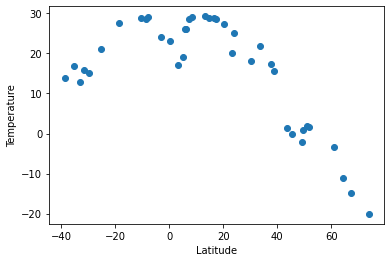

In [62]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_df['lat']
y_values = city_df['max_temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

<AxesSubplot:xlabel='lat', ylabel='humidity'>

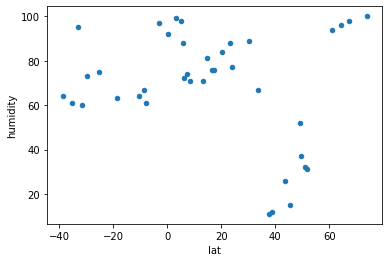

In [64]:
city_df.plot(kind='scatter', x='lat', y='humidity')

## Latitude vs. Cloudiness Plot

<AxesSubplot:xlabel='lat', ylabel='cloudiness'>

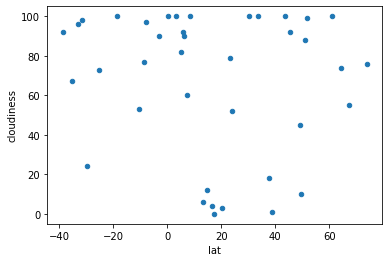

In [65]:
city_df.plot(kind='scatter', x='lat', y='cloudiness')

## Latitude vs. Wind Speed Plot

<AxesSubplot:xlabel='lat', ylabel='wind_speed'>

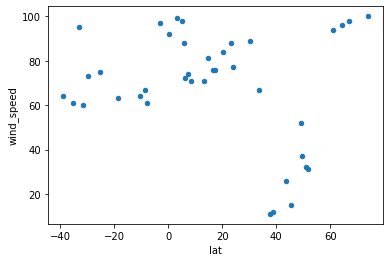

In [66]:
city_df.plot(kind='scatter', x='lat', y='wind_speed')

## Linear Regression

In [11]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

NameError: name 'stats' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression